$$
\begin{array}{c}
\textbf{INTRODUCTION TO CAUSAL INFERENCE}\\\\\\\\
\textbf{Daniela Pinto Veizaga, Xiang Pan, and Xiang Gao} \\
\textit{Center for Data Science, New York University} \\\\\\
\textit{September 6, 2024}
\end{array}
$$
---



![Causality](https://simons.berkeley.edu/sites/default/files/styles/hero_xxl_1x/public/2023-01/Causality_hi-res.jpg?h=6dcb57f1&itok=5R0Da6OT)


## 1. Goals For Today

Through a guiding dummy example, the goal of this class is to:

- Distinguish between descriptive and causal questions.
- Apply the all-causes model to represent potential outcomes.
- Identify and estimate causal parameters simulated data.
- Understand the key concepts behind identifying and estimating causal effects
---



In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Motivating Case: The Effect of Class Attendance On Grades

Imagine this: A curious professor is on a mission to find out if attending classes regularly really gives students that extra grade boost. But there’s more to it — he's not just interested in *describing* what's happening. He's after something bigger: figuring out the *actual effect* of attendance on grades.

So, how do we go from simply observing grades to truly understanding *what causes* better performance? That's where the *all causes model* comes in. We're going to dive into a hands-on exploration to see how we can separate what's just descriptive from what's truly causal. Let's find out if showing up to class makes all the difference!


### 2.1) Setting Up the Notation

To dive deeper into the problem, let's define some key components:

- **$Y_i(s, u)$**: The outcome of interest or dependant variable, in this case, the grades for student $i$ under potential state $s$ and given all other factors $u$.
- **$i$**: An individual unit of observation—here, a student.
- **$s$**: A potential state of the world, such as regularly attending classes ($s = 1$) or attending irregularly ($s = 0$).
- **$u$**: All other factors that might influence grades, like study habits, prior knowledge, or motivation.



### 2.2) Descriptive Analysis


For learning purposes, let's simulate grades based on a normal distribution. This will allow us to later analyze how attendance impacts these grades.



<Axes: xlabel='Grade', ylabel='Density'>

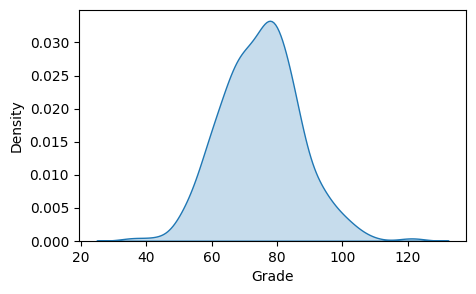

In [ ]:
# Setting a random seed for reproducibility
np.random.seed(42)

# Parameters
students = 300
mean_grade = 75
std_grade = 12


# Simulate attendance and grades
grades = np.random.normal(mean_grade, std_grade, students)
attendance = np.random.binomial(1, 0.6, students)
grades = pd.DataFrame({
    'Grade': grades,
    'Attendance': attendance
})

# Plot
plt.figure(figsize=(5, 3))
sns.kdeplot(grades['Grade'], fill=True)


Let’s start by examining the current state of the world, focusing on a straightforward descriptive question: **What is the average grade in this course?** Notice, here we are not distinguishing between different attendance patterns — our goal is to simply describe the grades as they are:

- **_Current State ($s$):_** This represents the actual, observed state of the world where students have varied levels of attendance, but we are not yet separating them into “regular” or “irregular” attendance categories.
  
- **_Outcome ($Y_i(s, u)$):_** The grade $Y_i$ for student $i$ given their current attendance pattern $s$ and other influencing factors $u$.

To calculate the average grade, we observe:

$$
\mathbb{E}[Y] = \frac{1}{N} \sum_{i=1}^N Y_i(s, u)
$$

where:
- $N$ is the number of students.
- $s$ is the current attendance status for each student (which varies but is not yet isolated into specific patterns).
- $u$ includes other relevant factors like study habits, prior knowledge, and motivation.

In [73]:
grades.head(5)

,Grade,Attendance
0,80.960570,1
1,73.340828,1
2,82.772262,0
3,93.276358,0
4,72.190160,0


In [ ]:
print(f"Average grade in the course is {grades.mean():.2f}.")

Average grade in the course is 74.93.


**Great, can we now answer what is the effect of attendance on grades? Not yet! Why?** Even though we've got some insights from our descriptive analysis, there's a big issue we can't overlook: we're only seeing each student in **one attendance scenario** — either regular or irregular.

We have no idea what would happen to their grades if they switched their attendance pattern! This missing information —**the counterfactual**— is exactly what makes causal inference so tricky and it's known as **the fundamental problem of causal inference**.


### 2.3) Moving from Descriptive to Causal Analysis in a Perfect World (For Now)

For now, let's assume:

1. **Perfect Knowledge of Both States:** We assumed we could observe both regular $Y_i(1, u)$ and irregular attendance $Y_i(0, u)$ grades for every student — something that’s impossible in the real world.
2. **No Confounding Factors:** Attendance is the only factor affecting grades, which may not be true in reality.
3. **Random Assignment:** Attendance can simulated as being randomly assigned, avoiding biases often seen in real-world settings.

Given our “perfect world”, let's define the **Average Treatment Effect (ATE)** as:

$$
\text{ATE} = \mathbb{E}[Y_i(1, u)] - \mathbb{E}[Y_i(0, u)],
$$

to estimate this effect by comparing the average grades for students in the regular attendance scenario versus those in the irregular attendance scenario.

In [ ]:
# Simulations
attend_effect = 10
attendance = np.random.binomial(1, 0.5, students)
grades_attend = grades + attendance * attend_effect
grades_nattend = grades

# Create DataFrame
attend = pd.DataFrame({
    'Student_ID': np.arange(1, students + 1),
    'Attendance': attendance,
    'Grade_With_Attendance': grades_attend,
    'Grade_Without_Attendance': grades_nattend
})


In [ ]:
attend.head(5)

,Student_ID,Attendance,Grade_With_Attendance,Grade_Without_Attendance
0,1,1,90.960570,80.960570
1,2,0,73.340828,73.340828
2,3,1,92.772262,82.772262
3,4,0,93.276358,93.276358
4,5,0,72.190160,72.190160


In [ ]:
# Calculate average grades for each state
avg_reg = attend[attend['Attendance'] == 1]['Grade_With_Attendance'].mean()
avg_irr = attend[attend['Attendance'] == 0]['Grade_Without_Attendance'].mean()

# Calculate the causal effect
ate = avg_reg - avg_irr

# Output results
print(f"Average grade with regular attendance: {avg_reg:.2f}")
print(f"Average grade with irregular attendance: {avg_irr:.2f}")
print(f"Regular attendance improves grades by {ate:.2f} points.")



Average grade with regular attendance: 84.37
Average grade with irregular attendance: 75.44
Regular attendance improves grades by 8.93 points.


Text(1.15, 94.37478680241622, 'ATE: 8.93 points')

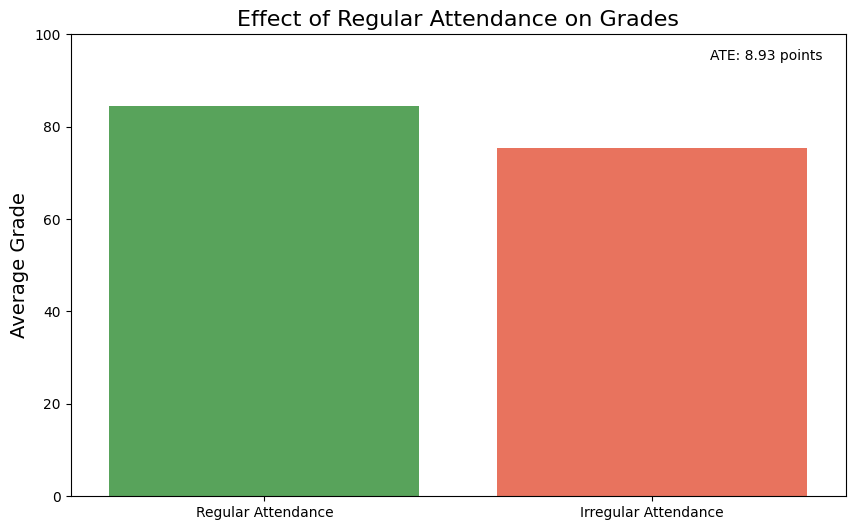

In [ ]:
# Plotting
labels = ['Regular Attendance', 'Irregular Attendance']
values = [avg_reg, avg_irr]
plt.figure(figsize=(10, 6))
sns.barplot(
    x=labels, y=values, hue=labels, palette=['#4CAF50', '#FF6347'], legend=False
    )
plt.title('Effect of Regular Attendance on Grades', fontsize=16)
plt.ylabel('Average Grade', fontsize=14)
plt.ylim(0, 100)
plt.annotate(
    f'ATE: {ate:.2f} points', xy=(0.95, avg_reg), xytext=(1.15, avg_reg + 10)
    )


## 3. Path Forward

In the upcoming classes, we’ll:
1. Dive deeper into the assumptions we’ve made and understand how to relax or verify them.
2. Explore statistical methods to estimate causal effects in more complex, real-world data settings.
3. Investigate how to identify and handle confounding variables using techniques like matching, regression, and instrumental variables.

By the end of this journey, you’ll be equipped with the tools to move from simple descriptive analysis to robust causal inference!
